

This is the **official YOLOv5 🚀 notebook** authored by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Unzip folder of data cleaned

Put the folder of cleaned data in the workspace of google colab with zip format, then unzip it.

In [ ]:
# !unzip /content/<folder_name.zip>

# For example
# !unzip /content/deep_fruits_data.zip 

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


# Make yaml file and put it in yolov5/data

In [ ]:
import yaml

a_yaml_file = open("/content/yolov5/data/deep_fruits_yaml.yaml")
parsed_yaml_file = yaml.load(a_yaml_file, Loader=yaml.FullLoader)
parsed_yaml_file

{'names': ['apple', 'avocado', 'mango', 'orange', 'rockmelon', 'strawberry'],
 'nc': 6,
 'train': '/content/deep_fruits_data/images/train',
 'val': '/content/deep_fruits_data/images/val'}

# 1. Train

**Fine-tuning** an existing model is very easy. We’ll use the largest model YOLOv3, which is also the most accurate.

To train a model on a custom dataset, we’ll call the train.py script. We’ll pass a couple of parameters: </br>

* img 640 - resize the images to 640x640 pixels
* batch 16 - 16 images per batch
* epochs 550 - train for 550 epochs
* data file.yaml - path to dataset config
* weights yolov5s.pt - use pre-trained weights from the YOLOv3 model
* cache - cache dataset images for faster training

All training results are saved to runs/train/ with incrementing run directories, i.e. runs/train/exp2, runs/train/exp3 etc.

In [ ]:
# Train YOLOv5s on file yaml for 550 epochs
!python train.py --img 640 --batch 16 --epochs 550 --data /content/yolov5/data/deep_fruits_yaml.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/deep_fruits_yaml.yaml, hyp=data/hyp.scratch.yaml, epochs=550, batch_size=16, img_size=[640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-225-g9ac7d38 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1

# 2. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

<img src="https://user-images.githubusercontent.com/26833433/114307955-5c7e4e80-9ae2-11eb-9f50-a90e39bee53f.png" width="900"> 

To test your model with video, you must put the video in the workspace and then add 'runs/train/exp/weights/last.pt' which is the result of model training, then add the path of video as shown below.

In [ ]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source 'https://www.youtube.com/watch?v=-DXQ0imLSGc&t=62s&ab_channel=MeghanaideasMeghanaideas'


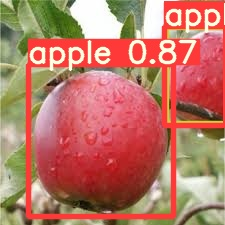

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp2/apple_fruit.jpg', width=300)

# 3. Visualize

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

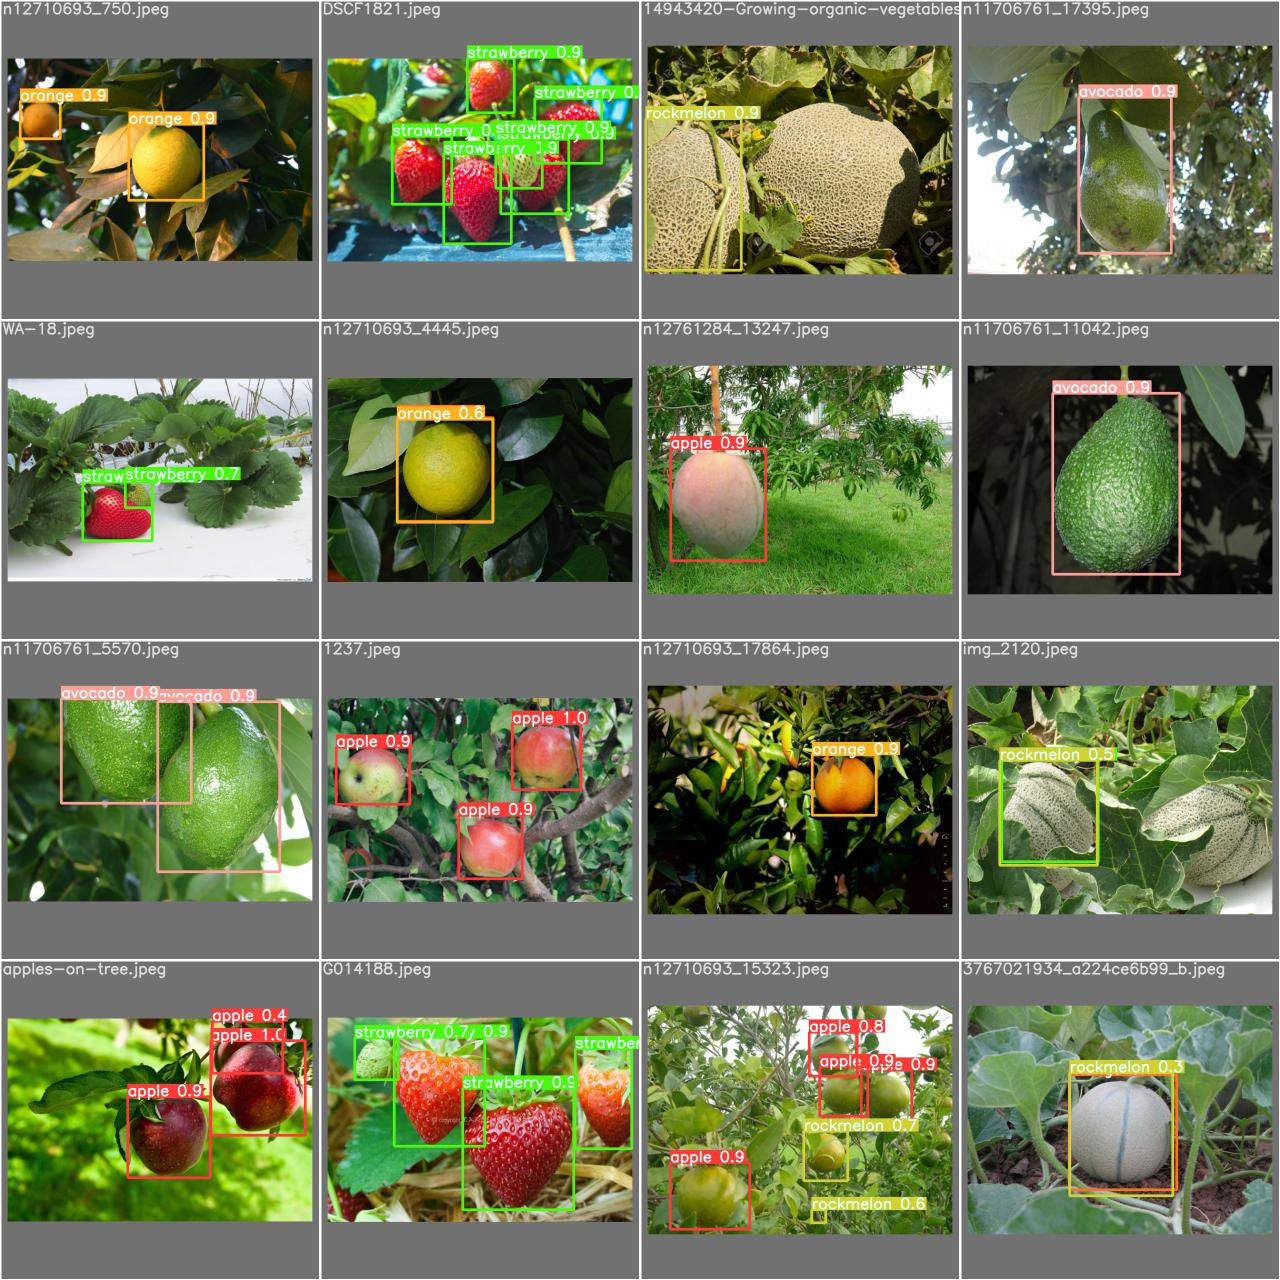

In [ ]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

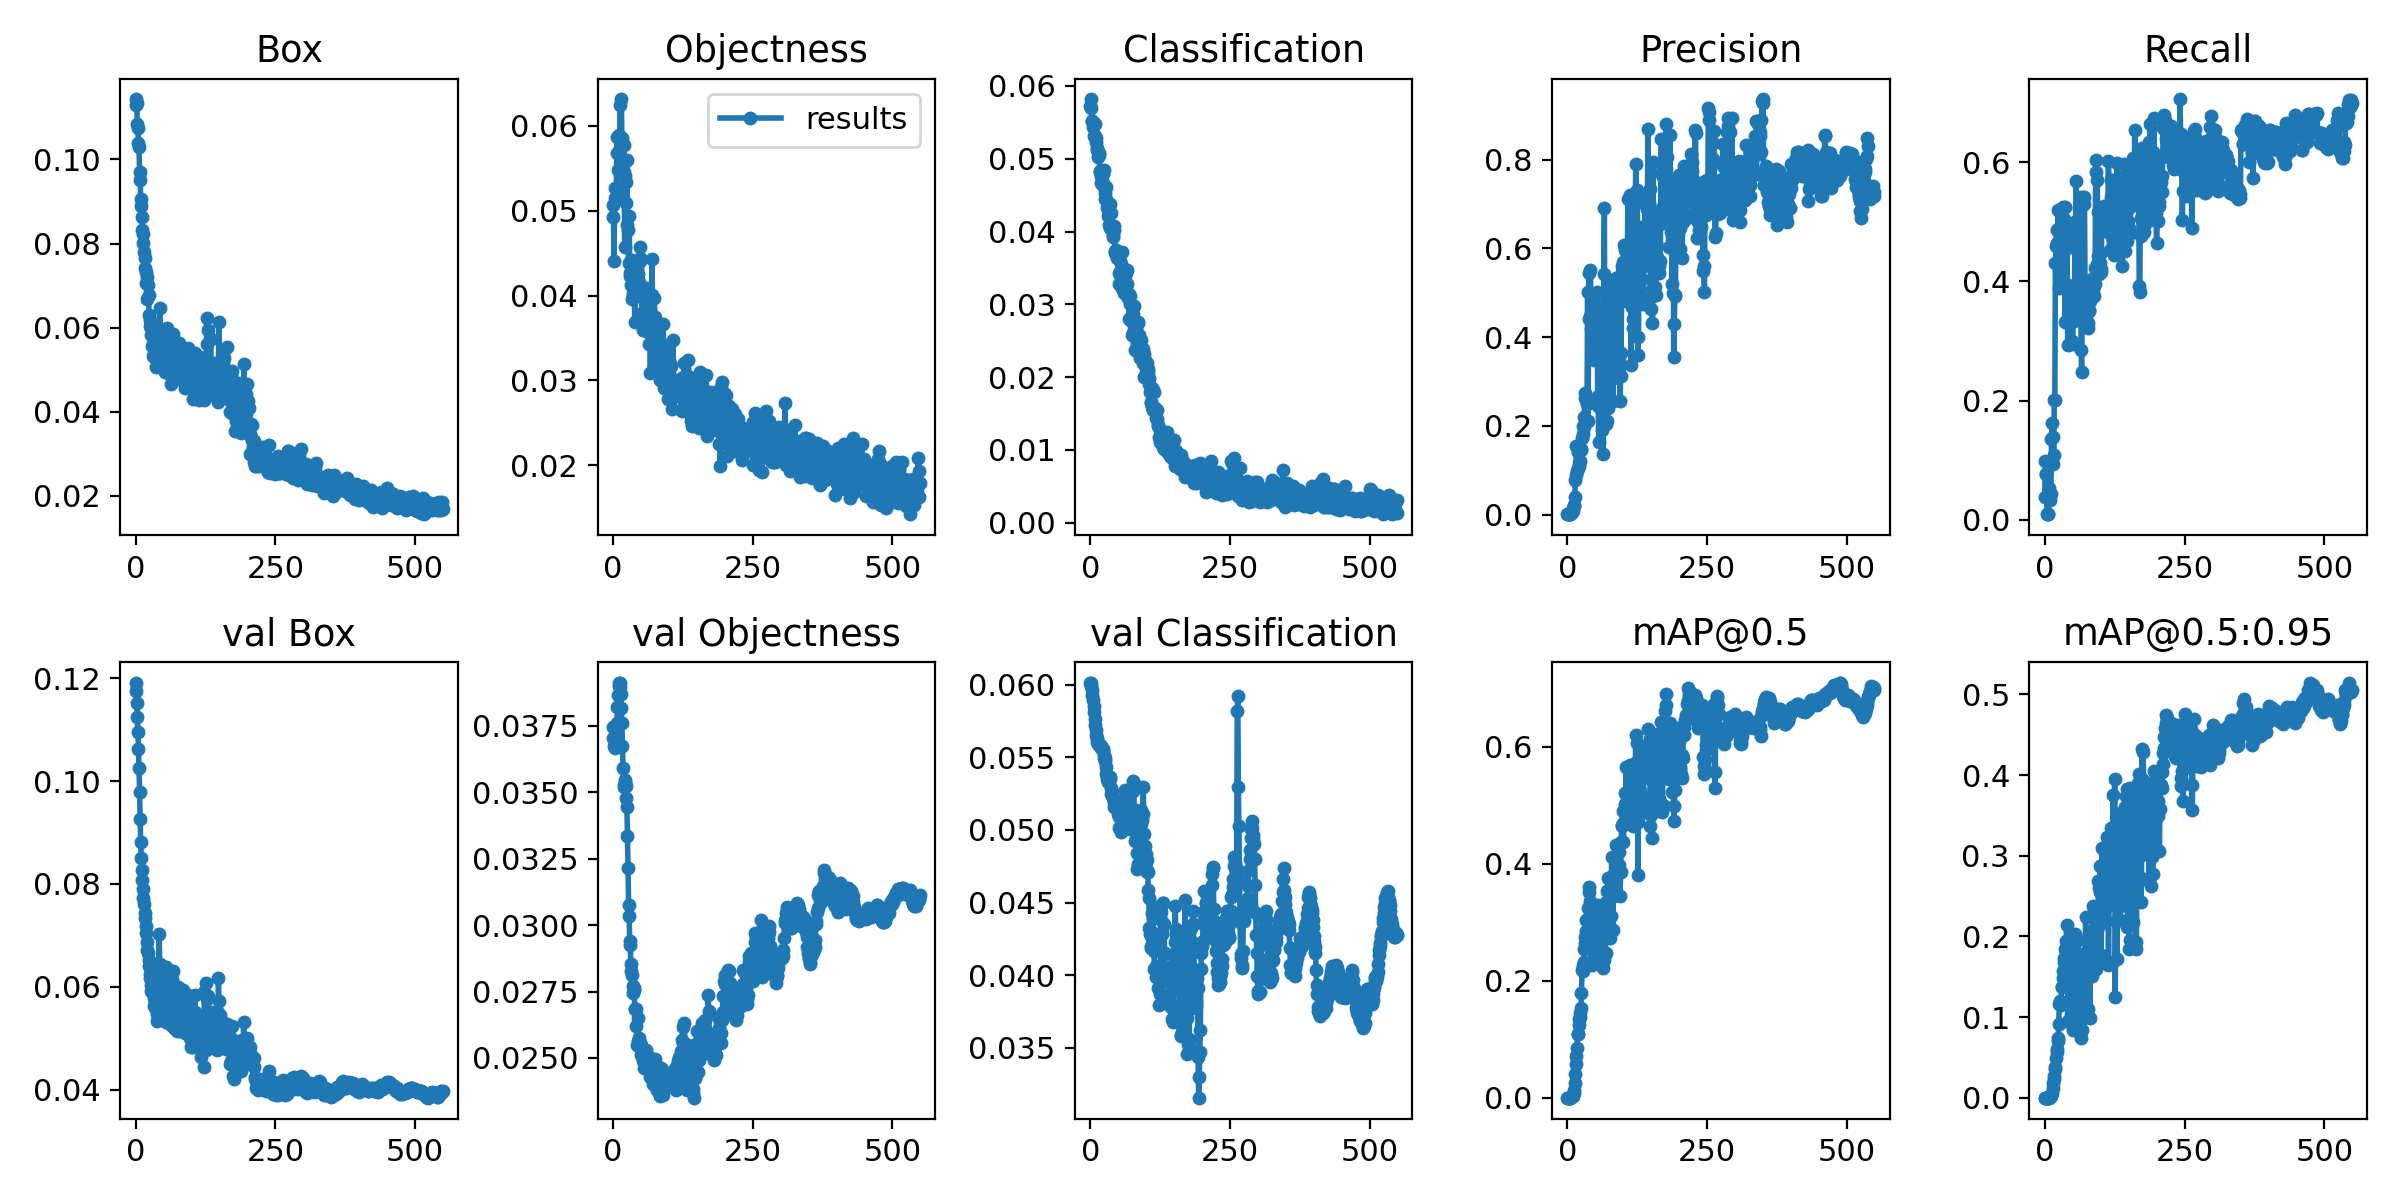

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>
